In [2]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df_url = "https://raw.githubusercontent.com/verneylmavt/2D_Project_Term-3/main/2D_Data-Set_Cambodia-Myanmar.csv"
df = pd.read_csv(df_url)

In [4]:
# 7 Columns, 4 Features & 1 Tragets with 2 additional columns as a Description
# 40 Rows, 2001-2020 Cambodia & 2001-2020 Myanmar
display(df)
print(df.shape)

,Country,Year,Percentage of Undernourishment Prevalence (3-Year Average),Binary Categorical,GDP per Capita (USD),Annual Inflation Rate (%),Gross per capita Production Index Number (2014-2016 = 100)
0,Cambodia,2001,23.6,0,321.150224,-0.600648,52.79
1,Cambodia,2002,21.2,0,338.987477,0.211467,49.46
2,Cambodia,2003,19.4,0,362.335482,0.941746,57.65
3,Cambodia,2004,18.5,0,408.513639,4.319337,53.83
4,Cambodia,2005,17.0,0,474.111192,6.615259,68.71
5,Cambodia,2006,15.6,0,539.750329,5.810686,73.50
6,Cambodia,2007,14.8,0,631.525258,8.708828,75.90
7,Cambodia,2008,14.5,0,745.609127,24.096852,81.68
8,Cambodia,2009,13.0,0,738.054731,-1.241718,84.33
9,Cambodia,2010,11.2,0,785.502700,4.000000,89.31


(40, 7)


In [5]:
print(list(df.columns))

['Country', 'Year', 'Percentage of Undernourishment Prevalence (3-Year Average)', 'Binary Categorical', 'GDP per Capita (USD)', 'Annual Inflation Rate (%)', 'Gross per capita Production Index Number (2014-2016 = 100)']


In [6]:
# Preparation Functions
def get_features_targets(df, feature_names, target_names):
    df_feature = df.loc[:, feature_names]
    df_target = df.loc[:, target_names]
    return pd.DataFrame(df_feature), pd.DataFrame(df_target)


def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    df_feature_rows, df_feature_columns = df_feature.shape
    array_all = list(range(0, df_feature_rows))
    
    np.random.seed(random_state)
    array_test = list(np.random.choice(array_all, int((df_feature_rows)*test_size), replace=False))
    array_train = [i for i in array_all if i not in array_test]
    
    df_feature_test = df_feature.iloc[array_test, :]
    df_feature_train = df_feature.iloc[array_train, :]
    df_target_test = df_target.iloc[array_test, :]
    df_target_train = df_target.iloc[array_train, :]
    
    return df_feature_train, df_feature_test, df_target_train, df_target_test


def normalize_z(dfin):
    mean = dfin.mean(axis=0)
    sd = dfin.std(axis=0)
    dfout = ((dfin.copy())-mean)/sd
    return dfout


def prepare_feature(df_feature):
    matrix_feature = (df_feature.copy()).to_numpy()
    matrix_one = np.ones([len(df_feature), 1])
    matrix_feature = np.concatenate((matrix_one, matrix_feature), axis=1)
    return matrix_feature


def prepare_target(df_target):
    matrix_target = (df_target.copy()).to_numpy()
    return matrix_target

In [32]:
# Calculation Functions
def calc_linear(X, beta):
    beta_new_rows = int((X.size)/(len(X)))
    beta_new_columns = int((beta.size)/(beta_new_rows))
    beta = beta.reshape(beta_new_rows, beta_new_columns)
    return np.matmul(X, beta)


def compute_cost(X, y, beta):
    yhat = calc_linear(X, beta)
    yhat_y = yhat - y
    J = (np.matmul((yhat_y).T, yhat_y))/(2*len(X))
    return J


def gradient_descent(X, y, beta, alpha, num_iters):
    J_storage = np.array([])
    for i in range(num_iters):
        cost_value = (calc_linear(X.T, ((calc_linear(X,beta))-y)))/(len(X))
        print("This is Cost Value", cost_value)
        beta = beta - alpha*cost_value
        print("This is beta", beta)
        J_storage = np.append(J_storage, cost_value)
    return beta, J_storage


def predict(df_feature, beta):
    df_feature_z = normalize_z(df_feature.copy())
    X = prepare_feature(df_feature_z)
    yhat = calc_linear(X, beta)
    return yhat


def linear_regression(X, y, alpha, iterations):
    beta = np.zeros(((X.shape[1]), 1))
    beta, J_storage = gradient_descent(X, y, beta, alpha, iterations)
    yhat = predict(X, beta)
    return beta, J_storage, yhat

In [8]:
# Metrics Functions
def r2_score(y, ypred):
    y_mean = np.mean(y)
    ss_tot = np.sum(np.power((y-y_mean), 2))
    ss_res = np.sum(np.power(np.subtract(y, ypred), 2))
    return 1 - ((ss_res)/ss_tot)


def mean_squared_error(y, ypred):
    ss_res = np.sum(np.power(np.subtract(y, ypred), 2))
    mse = (ss_res)/(len(y))
    return mse


def adjusted_r2_score(y, ypred, p):
    r2 = r2_score(y,ypred)
    n = y.shape[0]
    return 1 - (((1-r2)*(n-1))/(n-p-1))


def std_dev_score(y, ypred):
    n = y.shape[0]
    return (np.sum(np.subtract(y, ypred))/(n-1))**(0.5)


def std_error_reg_score(y, ypred, p):
    adjusted_r2 = adjusted_r2_score(y, ypred, p)
    std_dev = std_dev_score(y, ypred)
    return ((1-adjusted_r2)**(0.5))*std_dev

In [9]:
# CATEGORY:
#'Country' 
#'Year'

# TARGET: 
#'Percentage of Undernourishment Prevalence (3-Year Average)'

# FEATURES: 
#'Binary Categorical'
# 'GDP per Capita (USD)'
# 'Annual Inflation Rate (%)' 
# 'Gross per capita Production Index Number (2014-2016 = 100)'

In [24]:
# PREPARATION
# Extract the features and the target
features = ['Binary Categorical', 'GDP per Capita (USD)', 'Annual Inflation Rate (%)', 'Gross per capita Production Index Number (2014-2016 = 100)']
targets = ['Percentage of Undernourishment Prevalence (3-Year Average)']
df_features, df_target = get_features_targets(df, features, targets) #DataFrame

# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3) #DataFrame

# Normalize the features train using z normalization
df_features_train_z = normalize_z(df_features_train) #DataFrame

# Prepare the features train and target train to a NumPy
X = prepare_feature(df_features_train_z) #NumPy 5D
target = prepare_target(df_target_train) #NumPy 1D

Calculating

In [35]:
# CALCULATION
# Set the value of Iterations, Alpha, and Beta
iterations = 1500
alpha = 0.01
beta_multiple = np.zeros(((X.shape[1]), 1)) #NumPy 1D

# Call the gradient_descent function
beta_multiple, J_storage_multiple = gradient_descent(prepare_feature(df_features_train), prepare_target(df_target_train), beta_multiple, alpha, iterations)
print(beta_multiple)

# Call the predict() method to get the predicted value of Feature Test
pred = predict(df_features_test, beta_multiple) #NumPy 1D

This is Cost Value [[-1.28285714e+01]
 [-5.99285714e+00]
 [-7.79811484e+03]
 [-1.26802803e+02]
 [-1.04055564e+03]]
This is beta [[1.28285714e-01]
 [5.99285714e-02]
 [7.79811484e+01]
 [1.26802803e+00]
 [1.04055564e+01]]
This is Cost Value [[6.68598098e+04]
 [2.57929486e+04]
 [7.07291396e+07]
 [3.42808219e+05]
 [6.42254989e+06]]
This is beta [[-6.68469812e+02]
 [-2.57869557e+02]
 [-7.07213415e+05]
 [-3.42681416e+03]
 [-6.42150934e+04]]
This is Cost Value [[-6.03722110e+08]
 [-2.32745317e+08]
 [-6.39029786e+11]
 [-3.09000700e+09]
 [-5.80020544e+10]]
This is beta [[6.03655263e+06]
 [2.32719530e+06]
 [6.38959064e+09]
 [3.08966431e+07]
 [5.79956329e+08]]
This is Cost Value [[5.45453863e+12]
 [2.10281776e+12]
 [5.77354132e+15]
 [2.79177044e+13]
 [5.24039931e+14]]
This is beta [[-5.45393497e+10]
 [-2.10258504e+10]
 [-5.77290237e+13]
 [-2.79146147e+11]
 [-5.23981935e+12]]
This is Cost Value [[-4.92809643e+16]
 [-1.89986530e+16]
 [-5.21631074e+19]
 [-2.52232404e+17]
 [-4.73462467e+18]]
This is b

C:\Users\Ephyrus\AppData\Local\Temp\ipykernel_28820\1107568730.py:6: RuntimeWarning: overflow encountered in matmul
  return np.matmul(X, beta)
C:\Users\Ephyrus\AppData\Local\Temp\ipykernel_28820\1107568730.py:6: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(X, beta)
C:\Users\Ephyrus\AppData\Local\Temp\ipykernel_28820\1107568730.py:21: RuntimeWarning: invalid value encountered in subtract
  beta = beta - alpha*cost_value


This is Cost Value [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
This is beta [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
This is Cost Value [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
This is beta [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
This is Cost Value [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
This is beta [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
This is Cost Value [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
This is beta [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
This is Cost Value [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
This is beta [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
This is Cost Value [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
This is beta [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
This is Cost Value [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
This is beta [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
This is Cost Value [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
This is beta [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
This is Cost Value [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
This is beta [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
This is Cost Value [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
This is b

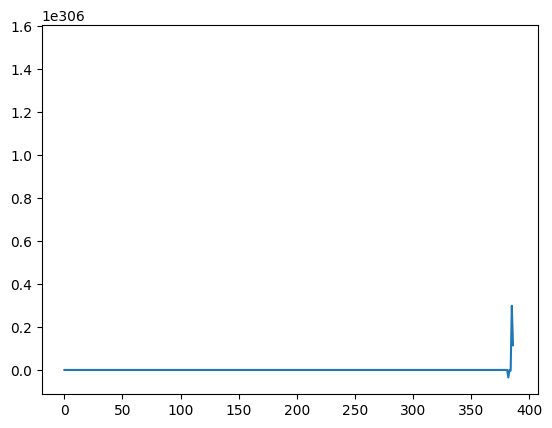

In [12]:
plt.plot(J_storage_multiple)

In [13]:
# Comparing Real Value vs Predicted Value of Test Dataset
df_compare_target_predict = df_target_test.copy()
df_compare_target_predict["Predicted Percentage of Undernourishment Prevalence (3-Year Average)"] = pred.copy()
display (df_compare_target_predict.sort_index(ascending=True))

,Percentage of Undernourishment Prevalence (3-Year Average),Predicted Percentage of Undernourishment Prevalence (3-Year Average)
0,23.6,NaN
6,14.8,NaN
7,14.5,NaN
19,6.3,NaN
20,37.6,NaN
21,34.8,NaN
25,24.5,NaN
28,12.9,NaN
33,5.1,NaN
34,4.2,NaN


Multiple Linear Regression Scatter Plot Graphing

In [14]:
target_test = prepare_target(df_target_test)

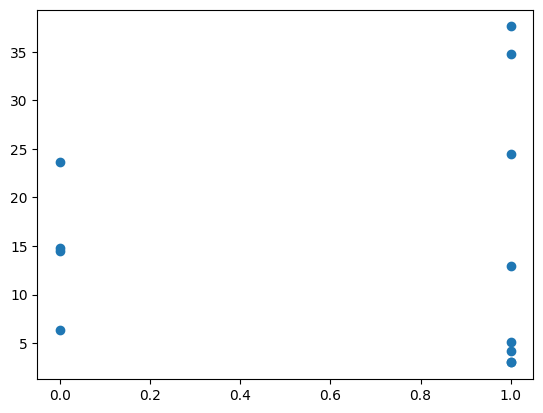

In [15]:
# Scatter Plot of Binary Categorical vs Percentage of Undernourishment Prevalence (3-Year Average)
plt.scatter(df_features_test["Binary Categorical"],target_test)
plt.scatter(df_features_test["Binary Categorical"],pred)

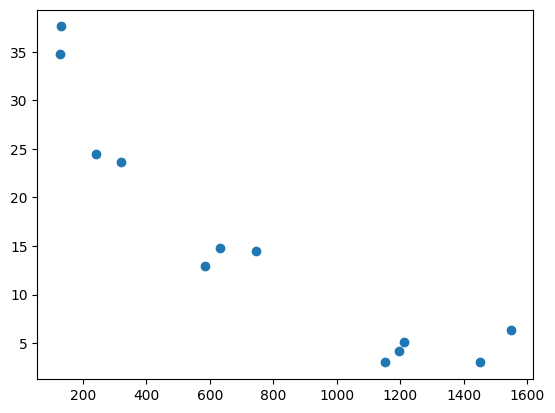

In [16]:
# Scatter Plot of GDP per Capita (USD) vs Percentage of Undernourishment Prevalence (3-Year Average)
plt.scatter(df_features_test["GDP per Capita (USD)"],target_test)
plt.scatter(df_features_test["GDP per Capita (USD)"],pred)

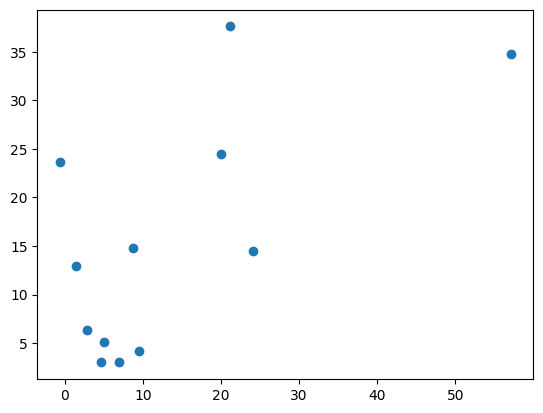

In [17]:
# Scatter Plot of Annual Inflation Rate (%) vs Percentage of Undernourishment Prevalence (3-Year Average)
plt.scatter(df_features_test["Annual Inflation Rate (%)"],target_test)
plt.scatter(df_features_test["Annual Inflation Rate (%)"],pred)

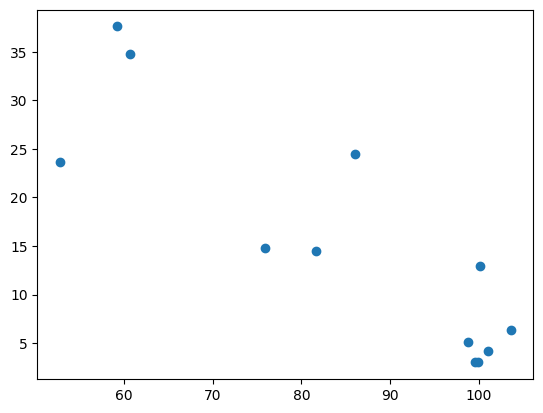

In [18]:
# Scatter Plot of Gross per capita Production Index Number (2014-2016 = 100) vs Percentage of Undernourishment Prevalence (3-Year Average)
plt.scatter(df_features_test["Gross per capita Production Index Number (2014-2016 = 100)"],target_test)
plt.scatter(df_features_test["Gross per capita Production Index Number (2014-2016 = 100)"],pred)

Metrics

In [19]:
# Mean Squared Error MSE
mse = mean_squared_error(y=prepare_target(df_target_test), ypred=pred)
print(mse)

nan


In [20]:
# Coefficient of Determination R²
# Calculate r2 score by calling a function, the arguments must be a NumPy
r2 = r2_score(y=prepare_target(df_target_test), ypred=pred)
print(r2)

nan


In [21]:
# Adjusted Coefficient of Determination Adjusted R²
# Calculate adjusted r2 score by calling a function, the arguments must be a NumPy for y and ypred
# P is the number of Independent Variables, which are the length of Features list
adjusted_r2 = adjusted_r2_score(y=prepare_target(df_target_test), ypred=pred, p=len(features))
print(adjusted_r2)

nan


In [22]:
# Standard Error of Regression S
std_eror_reg = std_error_reg_score(y=prepare_target(df_target_test), ypred=pred, p=len(features))
print(std_eror_reg)

nan
